In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from scipy.misc import derivative

In [76]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x

In [90]:
x = np.linspace(-7,5,10000)
X, Y = x, function(x)
print(np.where(Y==np.min(Y)))


(array([4485], dtype=int64),)


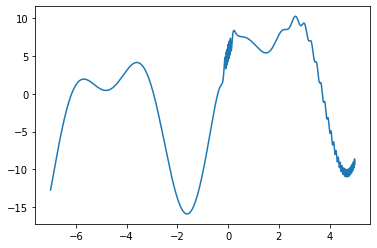

In [6]:
plt.plot(X, Y)

The following algorithm is supposed to iteratively find the minimum of a function. 

What problem does it have?

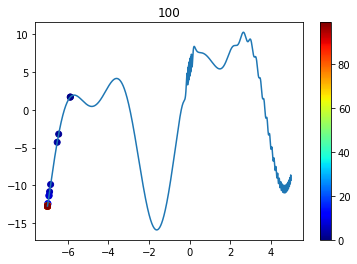

In [79]:
import matplotlib.cm as cm
x = X
index = np.random.randint(0, len(x)) # randomly select an index to sample a point
point = x[index] # sample a point to start
derivative_in_point = derivative(function, point)
it = 0 # current iteration
max_it = 100 # set the max number of iterations to avoid infinite loops
points = [] # list of the points we have inspected
threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
while np.abs(derivative_in_point)> 0.01 and it<max_it: 
    if derivative_in_point < 0: # the slope is negative
        x = x[index:] # since the slope is negative, the local minimum should be on the right
        index = np.random.randint(0, len(x)) # randomly select an index
        point = x[index] # sample the next point in the new interval
        points.append(point) # store for later
        derivative_in_point = derivative(function, point) # compute the derivative in the new point
    else:
        x = x[0:index+1] # the slope is positive, so the minimum should be on the left
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)
    it +=1
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()


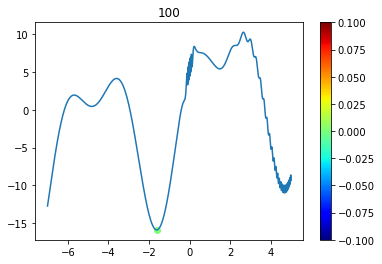

In [114]:
import matplotlib.cm as cm
x = X
index = np.where(Y==np.min(Y)) # randomly select an index to sample a point
point = x[index] # sample a point to start
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(point), function(np.array(point)), c=range(len(point)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()

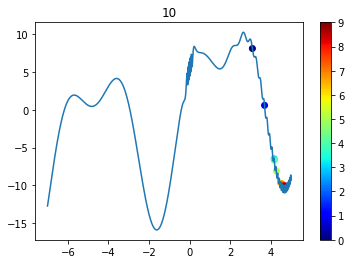

In [113]:
#  My algorithm not yet done
max_it= 10
import matplotlib.cm as cm

x = np.linspace(-7,5,10000)
X, Y = x, function(x)
maxi_it =50
def gradient_descent(function,X,maxi_it):
    x=X
    index = np.random.randint(0, len(x)) # randomly select an index to sample a point
    point = x[index] # sample a point to start
    derivative_in_point = derivative(function, point)
    it = 0 # current iteration
#     max_it = 100 # set the max number of iterations to avoid infinite loops
    points = [] # list of the points we have inspected
    threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
    while np.abs(derivative_in_point)> 0.01 and it<max_it: 
        if derivative_in_point < 0: # the slope is negative
            x = x[index:] # since the slope is negative, the local minimum should be on the right
            index = np.random.randint(0, len(x)) # randomly select an index
            point = x[index] # sample the next point in the new interval
            points.append(point) # store for later
            derivative_in_point = derivative(function, point) # compute the derivative in the new point
        else:
            x = x[0:index+1] # the slope is positive, so the minimum should be on the left
            index = np.random.randint(0, len(x))
            point = x[index]
            points.append(point)
            derivative_in_point = derivative(function, point)
        it +=1
    plt.figure()
    plt.plot(X,Y)
    plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
    plt.title(str(it))
    plt.colorbar()

    return
gradient_descent(function,x,maxi_it)

Minimum: -29.078203723486165


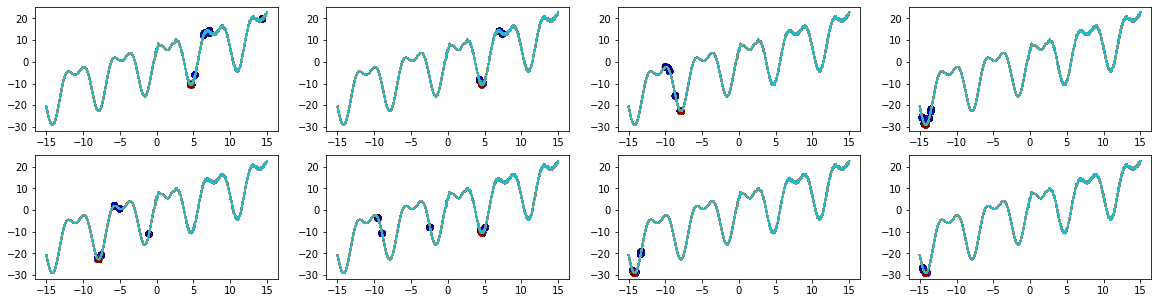

In [152]:
def gradient_descent(function, low_range, high_range, density, iter_point_max, iter_avrg_max):
    """
    It takes a function, a range between 2 values (low & high), a density on the x axis, a maximum number of iterations to find the min,
    and a maximum number of iterations to find the absolute minimum among the relative minima. It returns the (hopefully) absolute
    minimum of the function.
    """
    threshold = 0.01
    fig, axs = plt.subplots(2, 4, figsize=(20,5))
    minima = []
    iter_avrg_count = 0
    while iter_avrg_count < iter_avrg_max:
        points = []
        derivative_in_points = []
        iter_point_count = 0
        plot_count = 0
        x = np.linspace(low_range, high_range, density)
        X, Y = x, function(x)
        index = np.random.randint(0, len(x))
        point = x[index]
        derivative_in_point = derivative(function, point)
        plot_count = 0
        while np.abs(derivative_in_point) > 0.01 and iter_point_count < iter_point_max:
            if derivative_in_point < 0:
                x = x[index:]
                index = np.random.randint(0, len(x))
                point = x[index]
                points.append(point)
                derivative_in_point = derivative(function, point)
                derivative_in_points.append(derivative_in_point)
            else:
                x = x[:index+1]
                index = np.random.randint(0, len(x))
                point = x[index]
                points.append(point)
                derivative_in_point = derivative(function, point)
                derivative_in_points.append(derivative_in_point)
            if iter_avrg_count < 4:
                axs[0, iter_avrg_count].plot(X, Y)
                axs[0, iter_avrg_count].scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
                # axs[0, iter_avrg_count].title(str(iter_point_count))
                # axs[0, iter_avrg_count].colorbar()
            elif iter_avrg_count < 8:
                axs[1, iter_avrg_count-4].plot(X, Y)
                axs[1, iter_avrg_count-4].scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
            iter_point_count += 1
        else:
            minima.append(function(point))
            # print(f"X: {derivative_in_points}\nY: {points}\nMinima: {minima}\n")
        iter_avrg_count += 1
            # print(minima)
        # if iter_avrg_count < 4:
        #     iter_avrg_count += 1
        # else:
        #     iter_avrg_count = 0
        #     plot_count += 1
    minimum = min(minima)
    # plt.figure()
    # plt.plot(X, Y)
    # plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
    # plt.title(str(iter_point_count))
    # plt.colorbar()
    print(f"Minimum: {minimum}")

gradient_descent(function,-15, 15, 1000, 100, 20)


## Exercise

1. Can you make the algorithm above to be implemented into a fuction `gradient_descent(function, X, max_it)`?

2. Run the experiment multiple times: do you notice any important difference at each iteration?

## Integral

Scipy library also offers the possibility to compute the integral of a function.

In addition, the method `plt.fill_between(section, function(section)` colors the area under the curve of a generic function. 

Search the documentation of both and compute the area under the curve of the functions in the given intervals of the following exercises and plot them.



### Example

interval = \[2,5\]

Function f(x) = x


In [37]:
from scipy import integrate
a, b = [2, 5]
def f(x):
    return x

result = integrate.quad(f, a, b)
result

(10.5, 1.1657341758564144e-13)

The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

More in https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html .

In [44]:
area_under_the_curve = result[0]

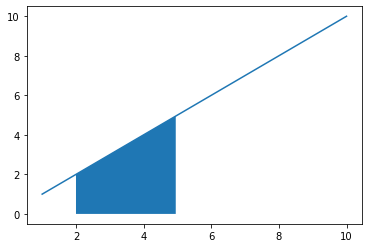

In [85]:
x = np.linspace(1,10, 100)
section = np.arange(2, 5, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))


(15.0, 1.6653345369377348e-13)


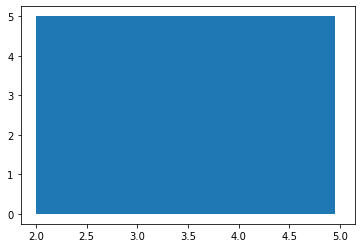

In [151]:
from scipy import integrate
a, b = [2, 5]
def f_(x):
    return 5

result = integrate.quad(f_, a, b)
print(result)
x = np.linspace(-2,2, 100)
section = np.arange(2, 5, 1/20)
plt.plot(5, f_(x))
plt.fill_between(section,f_(section))

1. interval = \[2,5\]

Function f(x) = 5

Compare the result computing the area by hand. Does it make sense?

Be careful: defining a constant function, you may end up with a single number instead of an array of the same size of the input. For this, I recommend to put in your function `constant_value*np.ones_like(x)`.

(41.67684067538809, 9.35056037314051, -41.67684067538809, 9.35056037314051)


<ipython-input-149-17a389867725>:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result1 = integrate.quad(f1, a, b)
<ipython-input-149-17a389867725>:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose inte

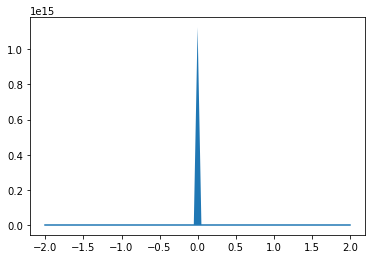

In [149]:
from scipy import integrate
a, b = [-1, 0]
c, d = [0, 1]
def f1(x):
    return (1/x)
result1 = integrate.quad(f1, a, b)
result = integrate.quad(f1, c, d)
print(result+result1)
x = np.linspace(-2,2, 20)
section = np.arange(-1, 1, 1/20)
plt.plot(x, f1(x))
plt.fill_between(section,f1(section))

2. interval = \[-1,1\]

Function f(x) = 1/x

2. interval = \[-pi,pi\]

Function f(x) = sin(x)

(0.0, 4.3998892617846e-14)


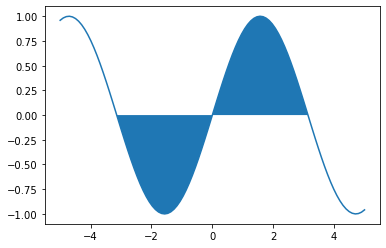

In [87]:
from scipy import integrate
a, b = [-np.pi, np.pi]
def f2(x):
    return (np.sin(x))

result = integrate.quad(f2, a, b)
print(result)
x = np.linspace(-5,5, 100)
section = np.arange(-np.pi, np.pi, 1/100)
plt.plot(x, f2(x))
# plt.plot(section,f2(section))
plt.fill_between(section,f2(section))

3. interval = \[-pi,pi\]

Function f(x) = cos(x)


(2.615901373506474e-16, 4.471737093238828e-14)


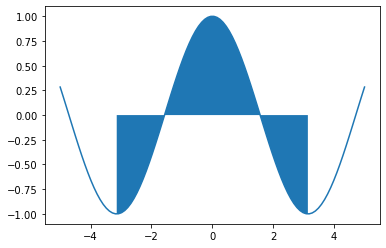

In [86]:
from scipy import integrate
a, b = [-np.pi, np.pi]
def f3(x):
    return (np.cos(x))

result = integrate.quad(f3, a, b)
print(result)
x = np.linspace(-5,5, 100)
section = np.arange(-np.pi, np.pi, 1/100)
plt.plot(x, f3(x))
plt.fill_between(section,f3(section))

2. interval = \[-pi,pi\]

Function f(x) = sin(x) - cos(2x)

(5.231802747012948e-16, 4.085699506880975e-09)


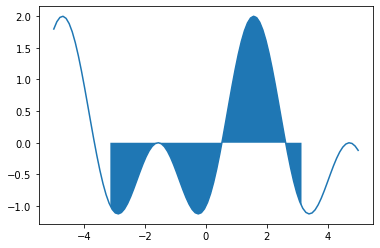

In [71]:
from scipy import integrate
a, b = [-np.pi, np.pi]
def f4(x):
    return (np.sin(x)-np.cos(2*x))

result = integrate.quad(f4, a, b)
print(result)
x = np.linspace(-5,5, 100)
section = np.arange(-np.pi, np.pi, 1/100)
plt.plot(x, f4(x))
plt.fill_between(section,f4(section))


None
[(array([3, 6, 9], dtype=int64),)] [0.53764    0.71641609 0.97171969]


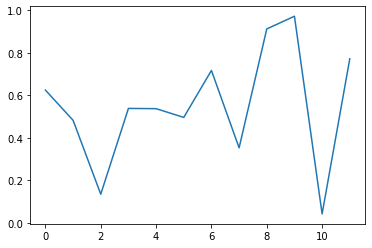

In [140]:
import numpy as np
from scipy.signal import argrelextrema

x = np.random.random(12)

# for local maxima
X=argrelextrema(x, np.greater)
m=[]
# for local minima
Y=argrelextrema(x, np.less)
plt.plot(x)
k=x[X]
print(m.append(X))
print(m,k)
